In [1]:
import sys
sys.path.append('/usr/local/lib/wingpro10')
sys.path.append('/home/yeison/Development/PythonDev/DunderLab/python-chaski')
import wingdbstub

In [2]:
import sys
import time
import asyncio
from datetime import datetime
from chaski.node import ChaskiNode
from itertools import product
import logging 
from names_generator import generate_name
import networkx as nx
import matplotlib.pyplot as plt
import random
from string import ascii_uppercase

logging.basicConfig(level=logging.DEBUG)
logging.getLogger('matplotlib').setLevel(logging.WARNING)


In [3]:
# host = '::1'  # IPV6
host = '127.0.0.1'  # IPV4

topics = list(ascii_uppercase[:3])
nodes = []
i = 0

def graph(nodes):
    G = nx.Graph()        # if message.data['remove_original']:
        # for client in self.client_pairs:
        # self.close_connection(client)
    
    nodes_ = []
    for node in nodes:
        nodes_.append({'name': node.name, 'server_pairs': {v.name:0 for v in node.server_pairs}})
    
    for node in nodes_:
        for neighbor, latency in node["server_pairs"].items():
            G.add_edge(node["name"], neighbor, weight=latency)
    
    # for edge in G.edges(data=True):
    #     print(edge)
    
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=100)
    plt.show()

In [4]:
# suscriptions = [random.choice(ascii_uppercase[:5]) for _ in range(20)]
# suscriptions

# suscriptions = list('ABCAB')
# suscriptions

suscriptions = list('ABBBBBBC')
suscriptions

['A', 'B', 'B', 'B', 'B', 'B', 'B', 'C']

In [5]:
nodes = [ChaskiNode(host, 65432+i, name=f'Node{i}', suscriptions=[sub], run=True, ttl=15, root=(i==0)) for i, sub in enumerate(suscriptions)]
nodes

[{Node0: {'A'}: 65432},
 {Node1: {'B'}: 65433},
 {Node2: {'B'}: 65434},
 {Node3: {'B'}: 65435},
 {Node4: {'B'}: 65436},
 {Node5: {'B'}: 65437},
 {Node6: {'B'}: 65438},
 {Node7: {'C'}: 65439}]

DEBUG:root:Node0: {'A'}: Serving on ('127.0.0.1', 65432)
DEBUG:root:Node1: {'B'}: Serving on ('127.0.0.1', 65433)
DEBUG:root:Node2: {'B'}: Serving on ('127.0.0.1', 65434)
DEBUG:root:Node3: {'B'}: Serving on ('127.0.0.1', 65435)
DEBUG:root:Node4: {'B'}: Serving on ('127.0.0.1', 65436)
DEBUG:root:Node5: {'B'}: Serving on ('127.0.0.1', 65437)
DEBUG:root:Node6: {'B'}: Serving on ('127.0.0.1', 65438)
DEBUG:root:Node7: {'C'}: Serving on ('127.0.0.1', 65439)


In [6]:
for node in nodes:
    print(node, node.ready())

{Node0: {'A'}: 65432} True
{Node1: {'B'}: 65433} False
{Node2: {'B'}: 65434} False
{Node3: {'B'}: 65435} False
{Node4: {'B'}: 65436} False
{Node5: {'B'}: 65437} False
{Node6: {'B'}: 65438} False
{Node7: {'C'}: 65439} False


In [7]:
await asyncio.sleep(5)

In [8]:
for node in nodes[1:]:
    await node.connect_to_peer(nodes[0])

DEBUG:root:Node1: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node2: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node3: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node4: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node5: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node6: {'B'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node7: {'C'}: New connection with ('127.0.0.1', 65432)
DEBUG:root:Node3: {'B'}: New connection with ('127.0.0.1', 65433)
DEBUG:root:Node6: {'B'}: New connection with ('127.0.0.1', 65433)
DEBUG:root:Node2: {'B'}: New connection with ('127.0.0.1', 65433)
DEBUG:root:Node4: {'B'}: New connection with ('127.0.0.1', 65433)
DEBUG:root:Node5: {'B'}: New connection with ('127.0.0.1', 65433)


In [9]:
await asyncio.sleep(0.5)

In [10]:
for node in nodes:
    print(node, node.ready())

{Node0: {'A'}: 65432} True
{Node1: {'B'}: 65433} False
{Node2: {'B'}: 65434} False
{Node3: {'B'}: 65435} False
{Node4: {'B'}: 65436} False
{Node5: {'B'}: 65437} False
{Node6: {'B'}: 65438} False
{Node7: {'C'}: 65439} False


Node0: {'A'} [Node1: {'B'}: N( 5,  100) 127.0.0.1: 65433, Node3: {'B'}: N( 9,  100) 127.0.0.1: 65435, Node6: {'B'}: N( 6,  100) 127.0.0.1: 65438, Node2: {'B'}: N( 9,  100) 127.0.0.1: 65434, Node4: {'B'}: N( 8,  100) 127.0.0.1: 65436, Node5: {'B'}: N( 6,  100) 127.0.0.1: 65437, Node7: {'C'}: N( 6,  100) 127.0.0.1: 65439]
Node1: {'B'} [Node0: {'A'}: N( 55,  100) 127.0.0.1: 65432]
Node2: {'B'} [Node0: {'A'}: N( 58,  100) 127.0.0.1: 65432]
Node3: {'B'} [Node0: {'A'}: N( 59,  100) 127.0.0.1: 65432]
Node4: {'B'} [Node0: {'A'}: N( 64,  100) 127.0.0.1: 65432]
Node5: {'B'} [Node0: {'A'}: N( 65,  100) 127.0.0.1: 65432]
Node6: {'B'} [Node0: {'A'}: N( 65,  100) 127.0.0.1: 65432]
Node7: {'C'} [Node0: {'A'}: N( 65,  100) 127.0.0.1: 65432]


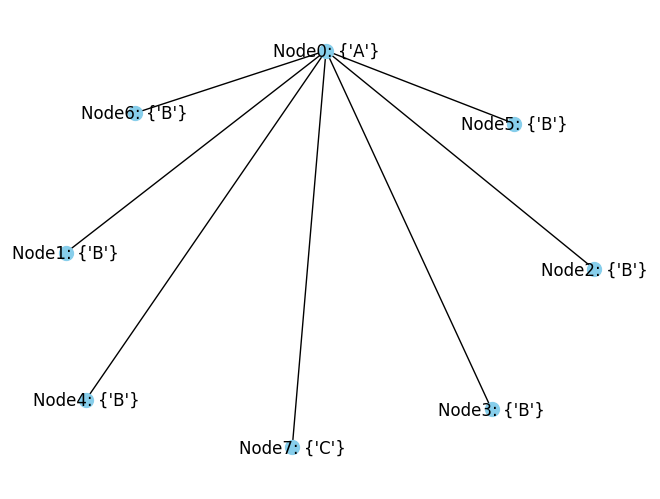

In [11]:
for node in nodes:
    print(node.name, node.server_pairs)

graph(nodes)

In [12]:
for node in nodes[1:]:
    # await asyncio.wait_for(node.discovery(on_pair='none'), 1)
    await node.discovery(on_pair='none')
    await asyncio.sleep(0.2)

In [13]:
await asyncio.sleep(0.5)

In [14]:
for node in nodes:
    print(node, node.ready())

{Node0: {'A'}: 65432} True
{Node1: {'B'}: 65433} True
{Node2: {'B'}: 65434} True
{Node3: {'B'}: 65435} True
{Node4: {'B'}: 65436} True
{Node5: {'B'}: 65437} True
{Node6: {'B'}: 65438} True
{Node7: {'C'}: 65439} True


Node0: {'A'} [Node1: {'B'}: N( 5,  100) 127.0.0.1: 65433, Node3: {'B'}: N( 9,  100) 127.0.0.1: 65435, Node6: {'B'}: N( 6,  100) 127.0.0.1: 65438, Node2: {'B'}: N( 9,  100) 127.0.0.1: 65434, Node4: {'B'}: N( 8,  100) 127.0.0.1: 65436, Node5: {'B'}: N( 6,  100) 127.0.0.1: 65437, Node7: {'C'}: N( 6,  100) 127.0.0.1: 65439]
Node1: {'B'} [Node0: {'A'}: N( 55,  100) 127.0.0.1: 65432, Node3: {'B'}: N( 1,  100) 127.0.0.1: 65435, Node5: {'B'}: N( 1,  100) 127.0.0.1: 65437, Node6: {'B'}: N( 1,  100) 127.0.0.1: 65438, Node2: {'B'}: N( 1,  100) 127.0.0.1: 65434, Node4: {'B'}: N( 1,  100) 127.0.0.1: 65436]
Node2: {'B'} [Node0: {'A'}: N( 58,  100) 127.0.0.1: 65432, Node1: {'B'}: N( 54,  100) 127.0.0.1: 65433]
Node3: {'B'} [Node0: {'A'}: N( 59,  100) 127.0.0.1: 65432, Node1: {'B'}: N( 53,  100) 127.0.0.1: 65433]
Node4: {'B'} [Node0: {'A'}: N( 64,  100) 127.0.0.1: 65432, Node1: {'B'}: N( 54,  100) 127.0.0.1: 65433]
Node5: {'B'} [Node0: {'A'}: N( 65,  100) 127.0.0.1: 65432, Node1: {'B'}: N( 53,  100) 1

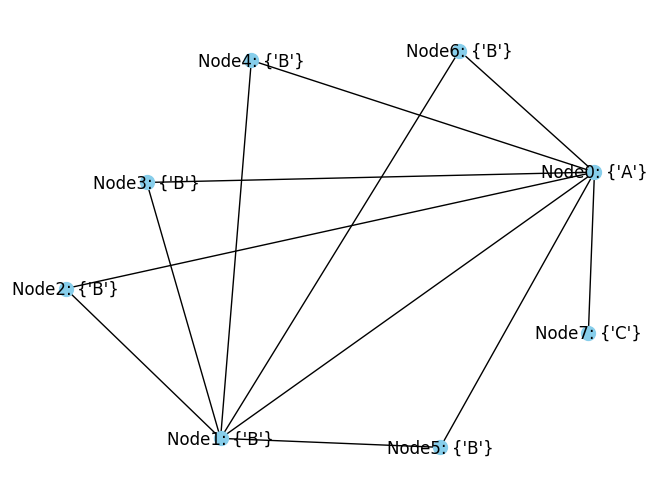

In [15]:
for node in nodes:
    print(node.name, node.server_pairs)

graph(nodes)

In [16]:
for node in nodes:
    uniqs = []
    for edge in node.server_pairs:

        if (node, edge.port) in uniqs:
            print('*', end='')
        print(node, edge.port, edge.address)
        uniqs.append((node, edge.port))

{Node0: {'A'}: 65432} 65433 ('127.0.0.1', 37536)
{Node0: {'A'}: 65432} 65435 ('127.0.0.1', 37550)
{Node0: {'A'}: 65432} 65438 ('127.0.0.1', 37576)
{Node0: {'A'}: 65432} 65434 ('127.0.0.1', 37542)
{Node0: {'A'}: 65432} 65436 ('127.0.0.1', 37566)
{Node0: {'A'}: 65432} 65437 ('127.0.0.1', 37568)
{Node0: {'A'}: 65432} 65439 ('127.0.0.1', 37586)
{Node1: {'B'}: 65433} 65432 ('127.0.0.1', 65432)
{Node1: {'B'}: 65433} 65435 ('127.0.0.1', 46114)
{Node1: {'B'}: 65433} 65437 ('127.0.0.1', 46156)
{Node1: {'B'}: 65433} 65438 ('127.0.0.1', 46126)
{Node1: {'B'}: 65433} 65434 ('127.0.0.1', 46134)
{Node1: {'B'}: 65433} 65436 ('127.0.0.1', 46146)
{Node2: {'B'}: 65434} 65432 ('127.0.0.1', 65432)
{Node2: {'B'}: 65434} 65433 ('127.0.0.1', 65433)
{Node3: {'B'}: 65435} 65432 ('127.0.0.1', 65432)
{Node3: {'B'}: 65435} 65433 ('127.0.0.1', 65433)
{Node4: {'B'}: 65436} 65432 ('127.0.0.1', 65432)
{Node4: {'B'}: 65436} 65433 ('127.0.0.1', 65433)
{Node5: {'B'}: 65437} 65432 ('127.0.0.1', 65432)
{Node5: {'B'}: 65437